# <font color=green>Day-3</font>

- Our topic of discussion is <font color=green size="4">**Decision Trees For Classification**</font>
- Dataset That we would be using : car_evaluation
    - The Dataset has already been downloaded and is placed in the folder ./Dataset/Classification/
    - Incase if you face any problems, you can download that dataset from kaggle using the link https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set
- Sections
    1. Importing Headers
    2. Importing Data
    3. Data Exploration
    4. Data Encoding
    5. EDA
    6. Data Preparation
    7. Modelling
    8. Tree Visualization
    9. Model Evaluation
    10. Imporving Accuracy using Cross Validation
    11. Model Evaluation - Cross Validated
    12. Hyper Parameter Tuning
    13. Model Evaluation - After Tuning Parameters
    
## <font color=green>Noteworthy Results</font>
- Normal Decision Tree Classifier
    - Training-set accuracy score: 0.8686
    - Testing-set accuracy score: 0.8596
- After Hyper Parameter Tuning
    - Training-set accuracy score: 1.0000
    - Testing-set accuracy score: 0.9684
    
## <font color=green>Future Scope</font>   
- Finding optimal depth for Decisiont ree instead of max_depth
- Boosting Algorithms can be tested and implemented

### Author of the Document : <font color="Green">Karnati Sai Venkata Giri</font>
### Feel free to reach me out at : <font color="Green">karnatisaivenkatagiri@gmail.com</font>

## 1. Importing Headers

In [1]:
# Computation Libraries
import numpy as np
import pandas as pd

# Stats Libraries
import statistics as stats

# Visualisazition Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Encoders
import category_encoders as ce

# Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

# Evaluation Metrics Libraries
from sklearn.metrics import accuracy_score

## 2. Importing Data


In [2]:
df = pd.read_csv("./Dataset/Classification/decision_car_evaluation.csv")
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
print("The dataset has {0} rows and {1} features".format(len(df),len(df.columns)))
df.head(5)

The dataset has 1727 rows and 7 features


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### <font color=green>Inferences</font>
- We have 1727 rows and 7 features
- Our Target Feature is "class"
- Our Data is in Categorical Format. We need to Enocode it appropriately

## 3. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

### <font color=green>Inferences</font>
- Our data is in String type
- There are no NULL values
- There are no Duplicates
- There are categorical values which we have to encode in further steps
- Our target variable has 4 classes

## 4. Data Encoding

In [7]:
# Data Encoding
encoder = ce.OrdinalEncoder(cols = df.columns)
df_transformed = encoder.fit_transform(df)
df_transformed.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,2,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


## 5. EDA

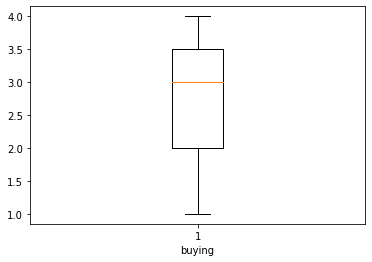

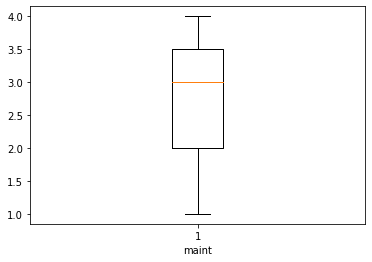

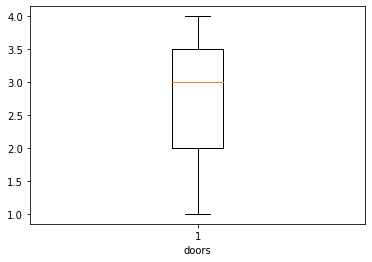

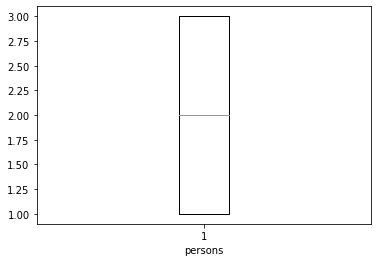

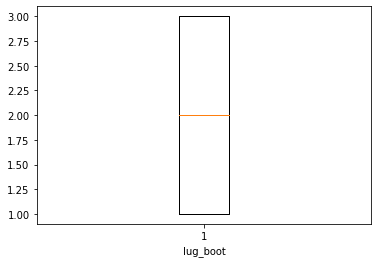

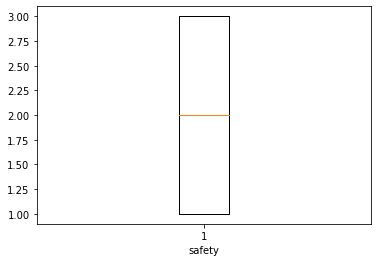

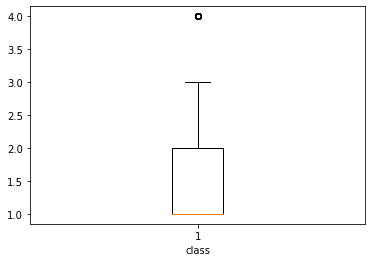

In [8]:
# Box plots for finding Outliers
for field in df_transformed.columns:
    plt.figure()
    plt.boxplot(df_transformed[field])
    plt.xlabel(field)

### <font color=green>Inferences</font>
- Box plots shows that there are no ouliers in input features but there are outliers on "class" features
- We cant remove this field because this is one category of data

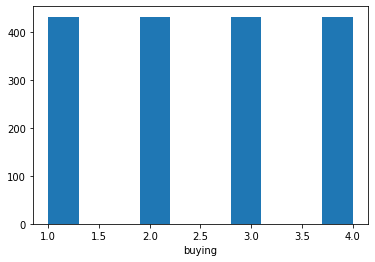

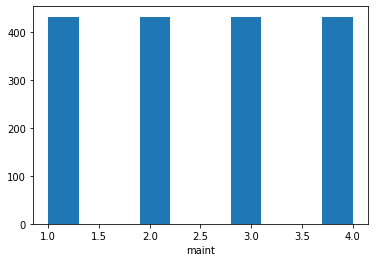

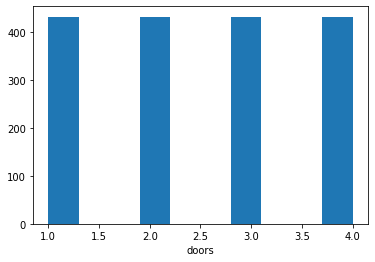

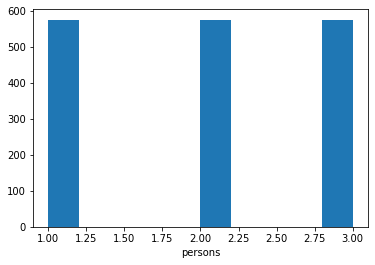

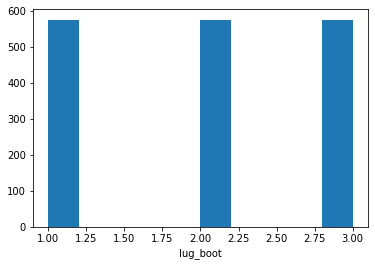

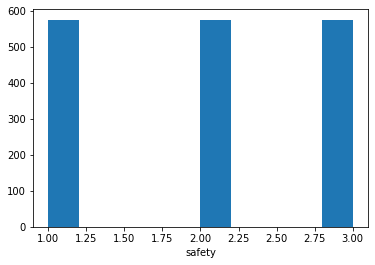

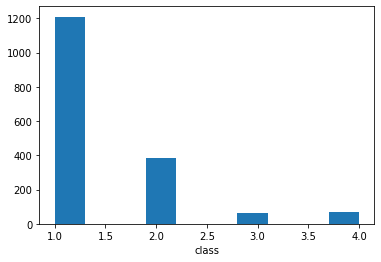

In [9]:
for field in df_transformed.columns:
    plt.figure()
    plt.hist(df_transformed[field])
    plt.xlabel(field)
    plt.show()

### <font color=green>Inferences</font>
- All features are balanced except for class feature.
- It's important to take a bananced sample input for training purposed and not a biased one

<AxesSubplot:>

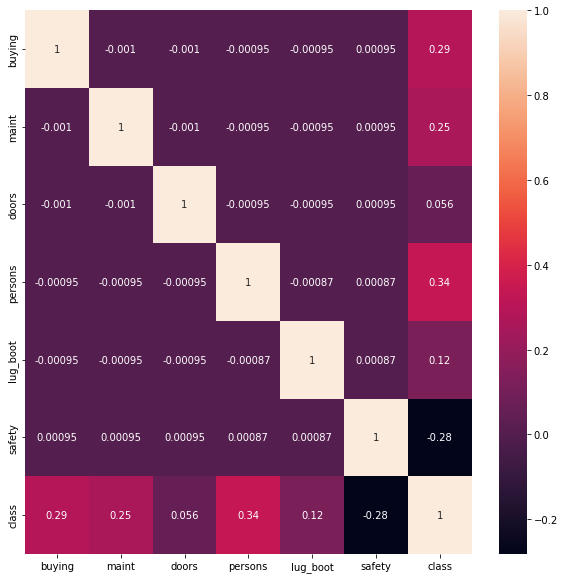

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df_transformed.corr(),annot=True)

### <font color=green>Inferences</font>
- There's no significatnt relationship between any features

## 6. Data Preparation

In [11]:
# Data Preparation
X = df_transformed.drop("class", axis = 1)
Y = df_transformed["class"]

train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.33, random_state = 42, stratify=Y)
# Note : We have used startify inorder to avoid bais between traiing set and testing set distribution
print(X.shape, Y.shape,train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(1727, 6) (1727,) (1157, 6) (570, 6) (1157,) (570,)


## 7. Modelling

In [12]:
# Modelling

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 42)
model.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

## 8. Tree Visualization

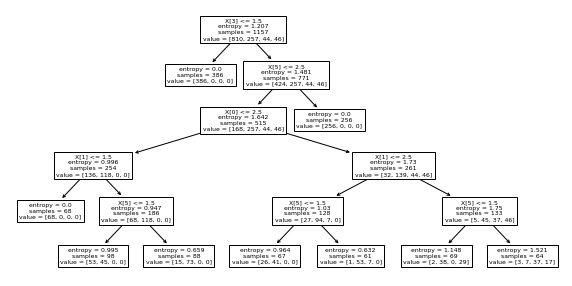

In [13]:
# Model Visualisazition

plt.figure(figsize=(10,5))
tree.plot_tree(model)
plt.show()

## 9. Model Evaluation

In [14]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_y, pred_train)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(test_y, pred_test)))

Training-set accuracy score: 0.8686
Testing-set accuracy score: 0.8596


In [15]:
from sklearn.metrics import classification_report

print(classification_report(test_y, pred_test))

              precision    recall  f1-score   support

           1       0.95      0.93      0.94       399
           2       0.71      0.82      0.76       127
           3       0.47      0.71      0.57        21
           4       0.00      0.00      0.00        23

    accuracy                           0.86       570
   macro avg       0.53      0.62      0.57       570
weighted avg       0.84      0.86      0.85       570



/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 10. Imporving Accuracy using Cross Validation

In [16]:
path = model.cost_complexity_pruning_path(train_x,train_y)

# path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities

print("ccp alpha wil give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.         0.01787931 0.02483542 0.04860279 0.06646059 0.07505679
 0.12200187 0.23783953]
***********************************************************
Impurities in Decision Tree : [0.37609414 0.39397345 0.41880887 0.46741166 0.53387225 0.60892904
 0.73093091 1.20660996]


In [17]:
# clfs will store all the models here
clfs=[]   

for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(train_x,train_y)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.237839525057277


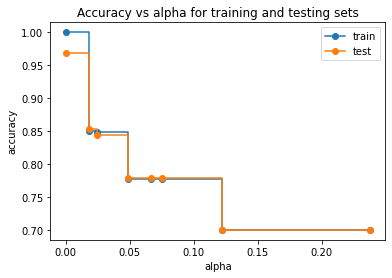

In [18]:
train_scores = [clf.score(train_x,train_y) for clf in clfs]
test_scores = [clf.score(test_x,test_y) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()


## 11. Model Evaluation - Cross Validated

In [19]:
pred_train = clf.predict(train_x)
pred_test = clf.predict(test_x)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_y, pred_train)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(test_y, pred_test)))

Training-set accuracy score: 0.7001
Testing-set accuracy score: 0.7000


In [20]:
from sklearn.metrics import classification_report

print(classification_report(test_y, pred_test))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82       399
           2       0.00      0.00      0.00       127
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        23

    accuracy                           0.70       570
   macro avg       0.17      0.25      0.21       570
weighted avg       0.49      0.70      0.58       570



/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 12. Hyper Parameter Tuning

In [21]:
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=model,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(train_x,train_y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 50),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

## 13. Model Evaluation - After Tuning Parameters

In [22]:
print("Tuned Hyperparameters :", grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy : 0.9680250783699058


In [23]:
pred_train = grid_search.predict(train_x)
pred_test = grid_search.predict(test_x)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_y, pred_train)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(test_y, pred_test)))

Training-set accuracy score: 1.0000
Testing-set accuracy score: 0.9684


In [24]:
from sklearn.metrics import classification_report

print(classification_report(test_y, pred_test))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       399
           2       0.94      0.93      0.93       127
           3       1.00      0.86      0.92        21
           4       0.91      0.87      0.89        23

    accuracy                           0.97       570
   macro avg       0.96      0.91      0.93       570
weighted avg       0.97      0.97      0.97       570

